In [22]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt


In [23]:
data_path = "C:/Users/mehmetcanak/Desktop/g/5.hafta/" 
train_data = np.loadtxt(data_path + "mnist_train.csv", delimiter=",") 
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",")

In [24]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [25]:
def get_my_mean_and_std(k=0,l=0,m=10000):
        s=0
        t=0
        for i in range(m):
            if(train_data[i,0]==k):
                s=s+1
                t=t+train_data[i,l+1]
        mean_1=t/s

        s,t=0,0
        for i in range(m):
            if(train_data[i,0]==k):
                s=s+1
                diff_1=train_data[i,l+1]-mean_1
                t=t+diff_1*diff_1
        std_1=np.sqrt(t/(s-1))
        return mean_1,std_1

In [26]:
import math
def my_pdf_1(x,mu=0.0,sigma=1.0):
    eps=np.finfo(float).eps
    x=float(x-mu)/(sigma+eps)
    return math.exp(-x*x/2.0)/math.sqrt(2.0*math.pi)/(sigma+eps)

In [27]:
c=1
l=100
get_my_mean_and_std(c,l)

(1.2972493345164153, 14.870650743271637)

In [28]:
test_value=45
my_pdf_1(test_value,4.0,2.0)

1.1059921901052853e-92

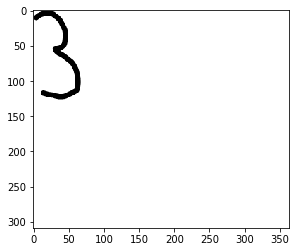

In [30]:
my_test_im=plt.imread('test6.PNG')
plt.imshow(my_test_im,cmap='gray')
plt.show()

In [36]:
my_test_im.shape
im2=my_test_im[0:28,0:28,0]
im2.shape #3 boyutlu olmaması için

(28, 28)

In [37]:
im3=im2.reshape(1,784)
im3.shape

(1, 784)

In [38]:
for i in range (10): 
    pdf_t=0
    for j in range (784):
        x=im3[0,j] #x=j'nin gösterdiği pixel değeri
        m1,std1=get_my_mean_and_std(i,j) #i.satırdaki ortalama ve varyans'ı yazar
        pdf_deger=my_pdf_1(x,m1,std1)
        pdf_t=pdf_t+pdf_deger
    print(pdf_t)

8.6240462657195e+16
1.0600390201613546e+17
5.390028916074688e+16
7.366372851968742e+16
5.9290318076821576e+16
6.288367068753804e+16
4.312023132859749e+16
1.239706650697177e+17
6.827369960361274e+16
1.2936069398579237e+17


In [39]:
list_1=[]
for i in range (10): 
    pdf_t=0
    for j in range (784):
        x=im3[0,j] #x=j'nin gösterdiği pixel değeri
        m1,std1=get_my_mean_and_std(i,j) #i.satırdaki ortalama ve varyans'ı yazar
        pdf_deger=my_pdf_1(x,m1,std1)
        pdf_t=pdf_t+pdf_deger
    #print(pdf_t)
    list_1.append(pdf_t)
print(max(list_1))

1.2936069398579237e+17
